In [5]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 60.2 MB/s eta 0:00:00


In [6]:
from pathlib import Path
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [7]:
class Configuration:
    def __init__(self, device="cuda", seed=88):
        self.device = device
        self.seed = seed
        self.generator = torch.Generator().manual_seed(seed)
        self.image_gen_steps = 25
        self.image_gen_model_id = "stabilityai/stable-diffusion-2"
        self.image_gen_size = (512, 512)
        self.image_gen_guidance_scale = 7
        self.prompt_gen_model_id = "gpt2"
        self.prompt_dataset_size = 10
        self.prompt_max_length = 8


In [8]:
def generate_image(model, config, prompt):
    image = model(
        prompt, num_inference_steps=config.image_gen_steps,
        generator=config.generator,
        guidance_scale=config.image_gen_guidance_scale
    ).images[0]

    image = image.resize(config.image_gen_size)
    return image

In [17]:
def setup_configuration():
    config = Configuration()

    # Load model
    image_gen_model = StableDiffusionPipeline.from_pretrained(
        config.image_gen_model_id, torch_dtype=torch.float16,
        revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
    )
    image_gen_model = image_gen_model.to(config.device)

    return config, image_gen_model

# Configuration and model setup
config, image_gen_model = setup_configuration()

vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token', 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Enter your prompt: dog in sky 


  0%|          | 0/25 [00:00<?, ?it/s]

Generated Image:
<PIL.Image.Image image mode=RGB size=512x512 at 0x7920EC596DD0>


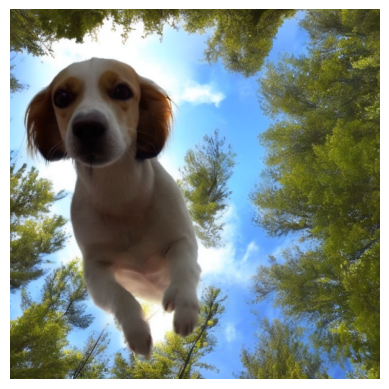

In [21]:
def generate_and_display_image():
    # Input prompt
    prompt_input = input("Enter your prompt: ")

    # Generate the image
    result_image = generate_image(image_gen_model, config, prompt_input)

    # Print the generated image for debugging
    print("Generated Image:")
    print(result_image)

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    generate_and_display_image()